In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
def noisy_image(image):
    noise = np.random.normal(0 , 50, size=image.shape ,)
    image = image + noise
    image[image > 255] = 255
    image[image < 0] = 0
    image = image.astype(np.uint8)
    return image
    

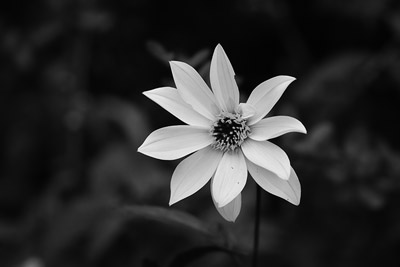

In [3]:
image = Image.open("picture.jpg")
image = image.convert("L")
image

In [4]:
image = np.array(image)
image

array([[ 5,  5,  5, ...,  9,  9, 10],
       [ 5,  5,  5, ...,  9,  9, 10],
       [ 5,  5,  5, ...,  9, 10, 10],
       ...,
       [21, 21, 21, ...,  8,  7,  6],
       [21, 21, 21, ...,  8,  7,  6],
       [21, 21, 21, ...,  8,  7,  6]], dtype=uint8)

In [5]:
noisy_image = noisy_image(image)
noisy_image

array([[ 20,  44,  55, ...,  94, 101,  81],
       [ 15,   0,   0, ...,   0,   0, 134],
       [  0,   0,  30, ...,  41,  42,  41],
       ...,
       [ 47,   0,  45, ...,  99,  37,   0],
       [  0,  22,   0, ...,   0,  55,  35],
       [ 10,  46,   0, ..., 110,   0,   0]], dtype=uint8)

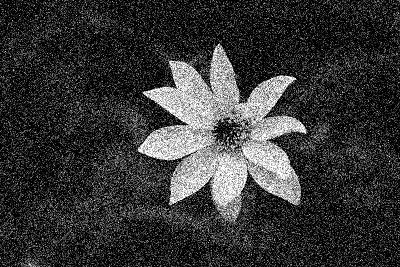

In [6]:
Image.fromarray(noisy_image)

In [7]:
U ,s ,Vt = np.linalg.svd(noisy_image)
np.diag(s)

array([[22719.02937557,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,  5605.22566005,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,  4585.16411969, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
          164.66598041,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,   156.83897038,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,   147.17998416]])

In [8]:
s.shape[0]

267

In [9]:
k_values = [10, 50, 100]
approximations = []
for k in k_values:
    # Truncate the singular value matrices
    Uk = U[:, :k]
    Sk = np.diag(s[:k])
    VTk = Vt[:k, :]
    Ak = np.dot(Uk, np.dot(Sk, VTk))
    approximations.append(Ak)

Rank-10 Approximation A_10:


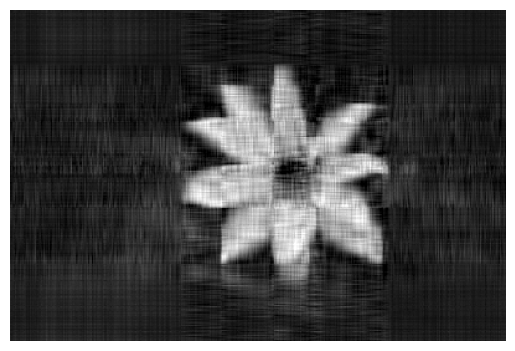



Rank-50 Approximation A_50:


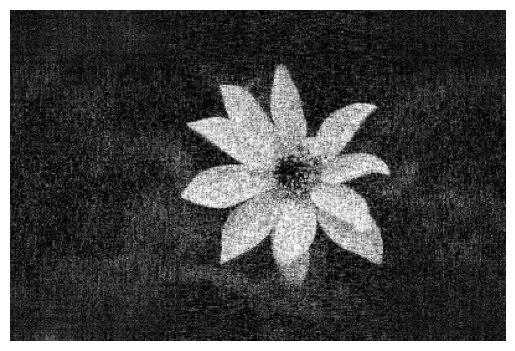



Rank-100 Approximation A_100:


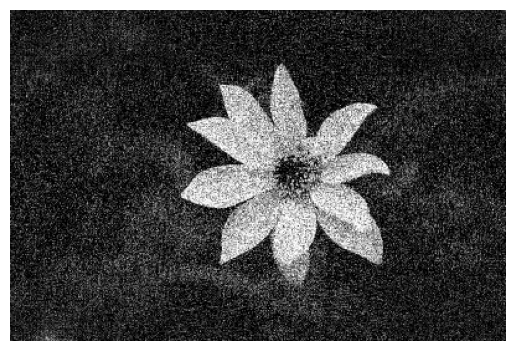

In [10]:
for k, Ak in zip(k_values, approximations):
    print(f"Rank-{k} Approximation A_{k}:")
    Ak_image = Image.fromarray(Ak)
    plt.imshow(Ak_image)
    plt.axis('off')  
    plt.show()
    print("\n")

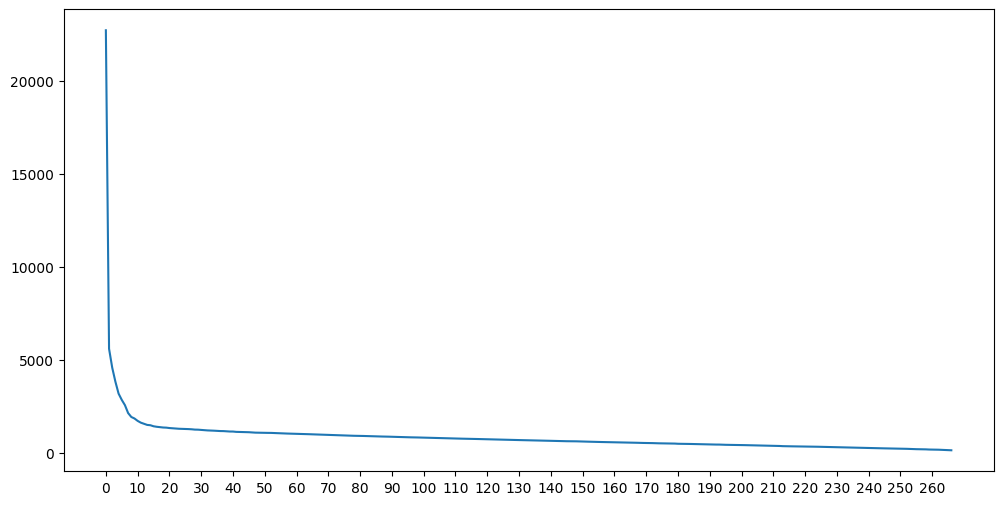

In [11]:
x_tick_labels = np.arange(0, s.shape[0] + 1,step=10)
x_tick_locations = np.arange(0, s.shape[0], 10)
plt.figure(figsize=(12, 6))
plt.plot(s)
plt.xticks(x_tick_locations,labels= x_tick_labels)
plt.show()